In [1]:
!pip3 install cloudmesh-installer

     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 71kB 4.5MB/s 
     |████████████████████████████████| 870kB 17.8MB/s 
     |████████████████████████████████| 133kB 32.5MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp37-none-any.whl size=38931 sha256=39b47160a8a625b3cc1f6d13aa482656eaf7e03db2b28b3ee4c97ea791b75ea0
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8210 sha256=0bcf9ee8d4da0cfc14b6437e3c0e54100ff385b867e1fe9c2df2a8c8c84db6d7
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built python-hostlist ordered-set
ERROR: pytest-cov 2.11.1 has requirement coverage>=5.2.1, but you'll have covera

In [1]:
!pip3 install cloudmesh-common

     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 133kB 32.9MB/s 
     |████████████████████████████████| 870kB 34.5MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp37-none-any.whl size=38931 sha256=206f8807d85b912a42eaa28e242763839e30d850249ba401bce49d06ad5d6ef4
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
Successfully built python-hostlist


In [91]:
from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Shell import Shell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, InputLayer, LSTM, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [89]:
file_url1 = 'https://www.data.go.kr/cmm/cmm/fileDownload.do?atchFileId=FILE_000000002338561&fileDetailSn=1&dataNm=%ED%95%9C%EA%B5%AD%EA%B0%80%EC%8A%A4%EA%B3%B5%EC%82%AC_%EC%9B%94%EB%B3%84%20%EC%A7%80%EC%97%AD%EB%B3%B8%EB%B6%80%EB%B3%84%20%EC%B2%9C%EC%97%B0%EA%B0%80%EC%8A%A4%20%EA%B3%B5%EA%B8%89%EB%9F%89_20200414'
file_url2 = 
file_url3 = 
file_url4 = 
file_url5 = 
destination1 = '/content/sample_data/a.csv'
destination1 = '/content/sample_data/a.csv'
destination1 = '/content/sample_data/a.csv'
destination1 = '/content/sample_data/a.csv'
destination1 = '/content/sample_data/a.csv'
Shell.download(file_url1, destination1, provider='system')

SyntaxError: ignored

## Data Pre-Process

Load the dataset. Each dataset includes time-based monthly data.
1. The amount of natural gas supply
2. The regional temperature 
3. The price of crude oil(4-types) 
4. The price of coal(3-types)
5. The exchange rate between US and South Korea

In [145]:
StopWatch.start("data-load")
# Dataset load

## Natural gas dataset
ng_sup_df = pd.read_csv('sample_data/NaturalGas_Supply_per_Region.csv')
ng_pro_df = pd.read_csv('sample_data/NaturalGas_Production.csv', encoding='CP949')

## Monthly average temperature dataset
tem_total = pd.read_csv('sample_data/Tem_korea.csv', encoding='CP949')
tem_df1 = pd.read_csv('sample_data/Tem_seoul.csv', encoding='CP949')
tem_df2 = pd.read_csv('sample_data/Tem_Incheon.csv', encoding='CP949')
tem_df3 = pd.read_csv('sample_data/Tem_suwon_kyunggi.csv', encoding='CP949')
tem_df4 = pd.read_csv('sample_data/Tem_wonju_gangwon.csv', encoding='CP949')
tem_df5 = pd.read_csv('sample_data/Tem_daejeon.csv', encoding='CP949')
tem_df6 = pd.read_csv('sample_data/Tem_gunsan_jeonbuk.csv', encoding='CP949')
tem_df7 = pd.read_csv('sample_data/Tem_gwangju.csv', encoding='CP949')
tem_df8 = pd.read_csv('sample_data/Tem_daegu.csv', encoding='CP949')
tem_df9 = pd.read_csv('sample_data/Tem_busan.csv', encoding='CP949')

## Monthly avarage precipation dataset
pre_total = pd.read_csv('sample_data/precipitation.csv', encoding='CP949')
pre_df1 = pd.read_csv('sample_data/Pre_seoul.csv', encoding='CP949')
pre_df2 = pd.read_csv('sample_data/Pre_incheon.csv', encoding='CP949')
pre_df3 = pd.read_csv('sample_data/Pre_suwon_kyunggi.csv', encoding='CP949')
pre_df4 = pd.read_csv('sample_data/Pre_wonju_gangwon.csv', encoding='CP949')
pre_df5 = pd.read_csv('sample_data/Pre_daejeon.csv', encoding='CP949')
pre_df6 = pd.read_csv('sample_data/Pre_gunsan_jeonbuk.csv', encoding='CP949')
pre_df7 = pd.read_csv('sample_data/Pre_gwangju.csv', encoding='CP949')
pre_df8 = pd.read_csv('sample_data/Pre_daegu.csv', encoding='CP949')
pre_df9 = pd.read_csv('sample_data/Pre_busan.csv', encoding='CP949')

## Crude oil price dataset
oil_df = pd.read_csv('sample_data/Crude_Oil_Price.csv')

## Coal price dataset
coal_df1 = pd.read_excel('sample_data/Coal_CIF_ARA.xls')
coal_df2  = pd.read_excel('sample_data/Coal_Kalimantan.xls')
coal_df3 = pd.read_excel('sample_data/Coal_Richards_Bay.xls')

## Exchange rate dataset
ex_df1 = pd.read_csv('sample_data/exchangerate.csv', encoding='CP949')
StopWatch.stop("data-load")

In [146]:
# Change column names to lowercase
df_names = [ng_sup_df, ng_pro_df, oil_df, coal_df1, coal_df2, coal_df3]
for name in df_names:
  name.columns = name.columns.str.lower()

In [147]:
total_ng_df = ng_sup_df.iloc[:,2:]

tem_df = pd.concat([tem_df1['avg_tem'],tem_df2['avg_tem'],tem_df3['avg_tem'],
                    tem_df4['avg_tem'],tem_df5['avg_tem'],tem_df6['avg_tem'], 
                    tem_df7['avg_tem'],tem_df8['avg_tem'],tem_df9['avg_tem']],axis=1)
tem_df.columns = ['avg_tem_seoul','avg_tem_incheon','avg_tem_kyunggi',
                  'avg_tem_gangwon','avg_tem_daejeon','avg_tem_jeonbuk',
                  'avg_tem_gwangju','avg_tem_daegu','avg_tem_busan']

pre_df = pd.concat([pre_df1['avg_precipitation'],pre_df2['avg_precipitation'],
                    pre_df3['avg_precipitation'],pre_df4['avg_precipitation'],
                    pre_df5['avg_precipitation'],pre_df6['avg_precipitation'],
                    pre_df7['avg_precipitation'],pre_df8['avg_precipitation'],
                    pre_df9['avg_precipitation']],axis=1)
pre_df.columns = ['avg_pre_seoul','avg_pre_incheon','avg_pre_kyunggi',
                  'avg_pre_gangwon','avg_pre_daejeon','avg_pre_jeonbuk',
                  'avg_pre_gwangju','avg_pre_daegu','avg_pre_busan']

coal_df = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
coal_df.columns = ['coal_price_ca', 'coal_price_ka', 'coal_price_rb']

ex_df = ex_df1.transpose()
ex_df.columns = ['rate']
ex_df.index = list(range(48))

In [148]:
ng_sup_df.head()

,year,month,seoul,incheon,gyeonggi,gangwon,chuncheong,jeonbuk,gwangju,daegu,busan
0,2016,1,1110948,539952,884621,77545,275615,230249,220168,355646,553342
1,2016,2,911323,441262,769085,63447,231933,178604,200121,299373,462628
2,2016,3,718859,387889,682050,55284,197986,193081,210464,271042,464287
3,2016,4,417299,288915,453910,33572,106757,137068,157493,208573,319444
4,2016,5,354428,278423,375331,44665,119412,153391,145237,198135,307294


In [149]:
tem_df.head()

,avg_tem_seoul,avg_tem_incheon,avg_tem_kyunggi,avg_tem_gangwon,avg_tem_daejeon,avg_tem_jeonbuk,avg_tem_gwangju,avg_tem_daegu,avg_tem_busan
0,-3.2,-2.2,-2.1,-2.5,-1.3,-0.5,0.9,-0.2,3.1
1,0.2,0.9,0.9,0.8,1.5,2.2,3.3,3.1,5.5
2,7.0,6.4,7.0,7.1,7.5,6.6,8.4,8.8,9.9
3,14.1,12.7,13.9,14.8,14.8,13.0,15.5,14.9,15.1
4,19.6,18.3,19.1,19.3,19.8,18.2,19.8,20.0,19.3


In [150]:
pre_df.head()

,avg_pre_seoul,avg_pre_incheon,avg_pre_kyunggi,avg_pre_gangwon,avg_pre_daejeon,avg_pre_jeonbuk,avg_pre_gwangju,avg_pre_daegu,avg_pre_busan
0,53,67,59,57,69,79,69,58,69
1,52,66,59,57,62,73,60,52,60
2,51,71,58,51,58,73,60,55,60
3,55,75,64,51,63,80,66,61,66
4,56,76,65,53,62,80,65,59,65


In [151]:
#df_total = pd.concat([ng_sup_df.iloc[:,2:], tem_df, pre_df,
#                      oil_df[['dubai','brent','wti','oman']],
#                      coal_df, ex_df['rate']], axis=1) 
#df_total = df_total.iloc[:-1,:]

In [152]:
df_total = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul'],
                      oil_df[['dubai','brent','wti','oman']],
                      coal_df, ex_df['rate']], axis=1) 
df_total = df_total.iloc[:-1,:]

In [153]:
#df1 = pd.DataFrame(ng_df.iloc[:,2:])
#df2 = pd.DataFrame(tem_df1['avg_tem'])
#df3 = pd.DataFrame(oil_df[['dubai','brent','wti','oman']])
#df4 = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
#df5 = pd.DataFrame(ex_df['rate'])
#df_seoul = pd.concat([df1,df2,df3,df4,ex_df],axis=1)
#df_seoul.head()
#df5.head()

In [154]:
#df1 = pd.DataFrame(ng_df['seoul'])
#df2 = pd.DataFrame(tem_df1['avg_tem'])
#df3 = pd.DataFrame(oil_df[['dubai','brent','wti','oman']])
#df4 = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
#df5 = pd.DataFrame(ex_df['rate'])
#df_seoul = pd.concat([df1,df2,df3,df4,ex_df],axis=1)
#df_seoul.head()
#df5.head()

In [155]:
df_total.head()

,seoul,avg_tem_seoul,avg_pre_seoul,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,1110948.0,-3.2,53.0,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,911323.0,0.2,52.0,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,718859.0,7.0,51.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,417299.0,14.1,55.0,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,354428.0,19.6,56.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


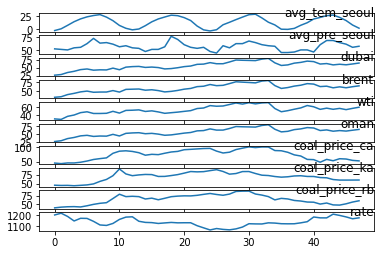

In [156]:
fig = plt.figure()
for i in range(1,df_total.shape[-1]):
  ax = fig.add_subplot(df_total.shape[-1]-1,1,i)
  ax.plot(df_total.iloc[:,i])
  ax.set_title(df_total.columns[i], y=0.5, loc='right')
plt.show()

In [157]:
## normalize data using MinMax
scaler = MinMaxScaler()
dataset = scaler.fit_transform(df_total)

In [158]:
## train_test_split
train_data = dataset[:,1:]
test_data = dataset[:,:1]
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data,
                                                    test_size=0.25,
                                                    random_state=20)

type(x_train)

numpy.ndarray

In [159]:
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (36, 10)
x_test.shape:  (12, 10)
y_train.shape:  (36, 1)
y_test.shape:  (12, 1)


In [160]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[-1])
x_test = x_test.reshape(x_test.shape[0] , 1, x_test.shape[-1])
#y_train = y_train.reshape(1, 36)
#y_test = y_test.reshape(1, 12)
print(x_train.shape)
print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(36, 1, 10)
(12, 1, 10)


In [161]:
#num_labels = len(y_train)
#input_shape = (36,10)
#units = 64
#dropout = 0.2

## Define Model

In [186]:
StopWatch.start("compile")
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[-1])))
model.add(Dense(1))

model.summary()
plot_model(model, show_shapes=True)
#tf.keras.utils.plot_model(model)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
StopWatch.stop("compile")

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 51        
Total params: 12,251
Trainable params: 12,251
Non-trainable params: 0
_________________________________________________________________


## Train

In [187]:
StopWatch.start("train")
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))
StopWatch.stop("train")

Epoch 1/500
2/2 [==============================] - 3s 593ms/step - loss: 0.1440 - accuracy: 0.0289 - val_loss: 0.3477 - val_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 64ms/step - loss: 0.1180 - accuracy: 0.0289 - val_loss: 0.3216 - val_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 63ms/step - loss: 0.1034 - accuracy: 0.0289 - val_loss: 0.2972 - val_accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 76ms/step - loss: 0.0873 - accuracy: 0.0289 - val_loss: 0.2749 - val_accuracy: 0.0000e+00
Epoch 5/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0797 - accuracy: 0.0289 - val_loss: 0.2546 - val_accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0679 - accuracy: 0.0289 - val_loss: 0.2364 - val_accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0651 - accuracy: 0.0289 - val_loss: 0.2205 - val_accuracy: 0.

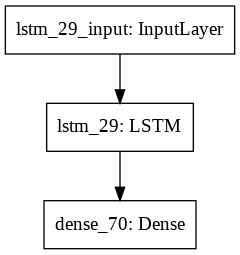

In [188]:
#print(model.summary())
tf.keras.utils.plot_model(model)

In [189]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

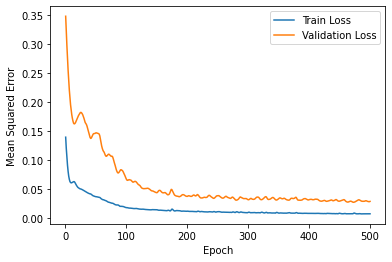

In [190]:
ax = plt.gca()
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [73]:
# model = Sequential()
# model.add(Dense(10))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation('softmax'))


# #model.summary()
# plot_model(model, show_shapes=True)

# model.compile(loss='mse',
#               optimizer='Adam',
#               metrics=['accuracy'])



In [76]:
# history = model.fit(x_train, y_train, epochs=50, validation_split=0.05)

AttributeError: ignored

In [175]:
# StopWatch.start("compile")
# model = Sequential()

# # LSTM Layers
# model.add(LSTM(units=units,
#                input_shape=input_shape,
#                return_sequences=True))
# model.add(LSTM(units=units,
#                dropout=dropout,
#                return_sequences=False))
# #model.add(LSTM(units=units,
# #               dropout=dropout,
# #               return_sequences=False))

# # MLP Layers
# model.add(Dense(units, input_dim=input_shape))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))
# model.add(Dense(units))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))

# # Softmax_layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))
# model.summary()
# plot_model(model, show_shapes=True)

# model.compile(loss='mse',
#               optimizer='adam',
#               metrics=['accuracy'])
# StopWatch.stop("compile")

## Train

In [191]:
# StopWatch.start("train")
# model.fit(x_train, y_train, epochs=50)
# StopWatch.stop("train")